In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score,confusion_matrix,classification_report
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
from urllib.parse import urlparse
import mlflow

In [16]:
iris = load_iris()

In [17]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

print(X.shape)
print(y.shape)

for i in [0,1,2]:
    print("classe : %s, nb exemplaires: %s" % (i, len(y[ y == i]) ) )
    


(150, 4)
(150,)
classe : 0, nb exemplaires: 50
classe : 1, nb exemplaires: 50
classe : 2, nb exemplaires: 50


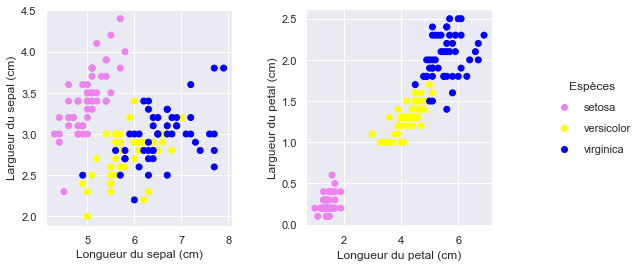

In [20]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = plt.subplot(1,2,1)

clist = ['violet', 'yellow', 'blue']
colors = [clist[c] for c in y]

ax1.scatter(X[:, 0], data[:, 1], c=colors)
plt.xlabel('Longueur du sepal (cm)')
plt.ylabel('Largueur du sepal (cm)')

ax2 = plt.subplot(1,2,2)

ax2.scatter(X[:, 2], X[:, 3], color=colors)

plt.xlabel('Longueur du petal (cm)')
plt.ylabel('Largueur du petal (cm)')

# Légende
for ind, s in enumerate(iris.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=clist[ind])
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1
           , bbox_to_anchor=(1.8, .5) , loc="center right", title='Espèces')
plt.plot();


In [22]:
sns.set()
df = pd.DataFrame(X, columns=iris['feature_names'] )
df['target'] = y
df['label'] = df.apply(lambda x: iris['target_names'][int(x.target)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


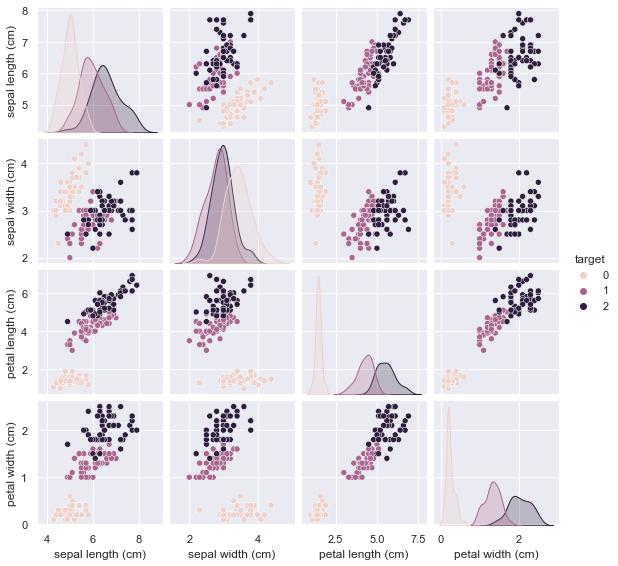

In [11]:
sns.pairplot(df, hue='target', vars=iris['feature_names'], size=2)

In [24]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [30]:


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [33]:
species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

'versicolor'

In [41]:
def accuracymeasures(y_test,predictions,avg_method):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average=avg_method)
    recall = recall_score(y_test, predictions, average=avg_method)
    f1score = f1_score(y_test, predictions, average=avg_method)
    target_names = ['0','1','2']
    print("Classification report")
    print("---------------------","\n")
    print(classification_report(y_test, predictions,target_names=target_names),"\n")
    print("Confusion Matrix")
    print("---------------------","\n")
    print(confusion_matrix(y_test, predictions),"\n")

    print("Accuracy Measures")
    print("---------------------","\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1score)
    
    return accuracy,precision,recall,f1score

In [47]:
max_depth = 5
n_estimators = 5

n_neighbors = 5


remote_server_uri = 'http://localhost:1234'

mlflow.set_tracking_uri(remote_server_uri)
mlflow.set_experiment('iris')

with mlflow.start_run(run_name='knn') as mlops_run:
    #model = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy,precision,recall,f1score = accuracymeasures(y_test,y_pred,'weighted')

    #mlflow.log_param("max_depth",max_depth)
    #mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("n_neighbors", n_neighbors)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1score)

    tracking_url_type_store = urlparse(mlflow.get_artifact_uri()).scheme

    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(
            model, 
            "model", 
            registered_model_name='knn_model')
    else:
        mlflow.sklearn.load_model(model, "model")

Classification report
--------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88        16
           2       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45
 

Confusion Matrix
--------------------- 

[[12  0  0]
 [ 0 14  2]
 [ 0  2 15]] 

Accuracy Measures
--------------------- 

Accuracy:  0.9111111111111111
Precision:  0.9111111111111111
Recall:  0.9111111111111111
F1 Score:  0.9111111111111111


Successfully registered model 'knn_model'.
2022/05/29 12:22:55 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: knn_model, version 1
Created version '1' of model 'knn_model'.
